In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [120]:
df = pd.read_csv('datatata/rfa_csv.csv')
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,NoLastYearPurchase,NeverOrdered
0,1,4.0,1,3,6.0,4,0,3.0,3,2,...,2,9,1,11.0,1.0,1.0,5.0,159.93,0,0
1,1,9.0,2,1,8.0,6,1,3.0,4,3,...,2,7,1,15.0,0.0,1.0,0.0,120.90,0,0
2,1,9.0,2,1,30.0,4,1,2.0,4,3,...,2,6,1,14.0,0.0,1.0,3.0,120.28,0,0
3,1,0.0,2,3,15.0,4,1,2.0,4,2,...,2,8,0,23.0,0.0,1.0,3.0,134.07,0,0
4,1,0.0,2,1,12.0,0,1,3.0,3,3,...,2,3,0,11.0,1.0,1.0,3.0,129.60,0,0


In [171]:
df['DaySinceLastOrder'].value_counts()

DaySinceLastOrder
3.0     900
2.0     792
1.0     614
8.0     538
0.0     496
7.0     447
4.0     431
47.0    307
9.0     299
5.0     228
10.0    157
6.0     113
11.0     91
12.0     69
13.0     51
14.0     35
15.0     19
17.0     17
16.0     13
18.0     10
30.0      1
46.0      1
31.0      1
Name: count, dtype: int64

In [196]:
df['DaySinceLastOrder']

KeyError: 'DaySinceLastOrder'

In [197]:
df.dtypes

R           int64
F           int64
Segment    object
dtype: object

### RFM 기반 데이터 가공
- Recency: 최근 구매일기준
- Frequency: 고객별 구매건수
- Monetary Value: 총 구매가격(단위가격 * 수량)

In [122]:
df['OrderCount'].value_counts()

OrderCount
2.0     2025
1.0     1751
3.0      371
0.0      258
7.0      206
4.0      204
5.0      181
8.0      172
6.0      137
9.0       62
12.0      54
11.0      51
10.0      36
14.0      36
15.0      33
13.0      30
16.0      23
Name: count, dtype: int64

In [123]:
# 구매가격

# R
# df['DaySinceLastOrder'] = df['']

# F
# df['OrderCount']

# A
cashback = 1  # cashback 수치 (%)

df['CashbackAmount'] = df['CashbackAmount']/(cashback/100)
rfm_df = df[['DaySinceLastOrder', 'OrderCount', 'CashbackAmount']]
rfm_df.head()

,DaySinceLastOrder,OrderCount,CashbackAmount
0,5.0,1.0,15993.0
1,0.0,1.0,12090.0
2,3.0,1.0,12028.0
3,3.0,1.0,13407.0
4,3.0,1.0,12960.0


In [124]:
# RFM
rfm_df = rfm_df.rename(columns = {
    'DaySinceLastOrder':'Recency',
    'OrderCount': 'Frequency',
    'CashbackAmount': 'Monetary'
})
rfm_df.head()

,Recency,Frequency,Monetary
0,5.0,1.0,15993.0
1,0.0,1.0,12090.0
2,3.0,1.0,12028.0
3,3.0,1.0,13407.0
4,3.0,1.0,12960.0


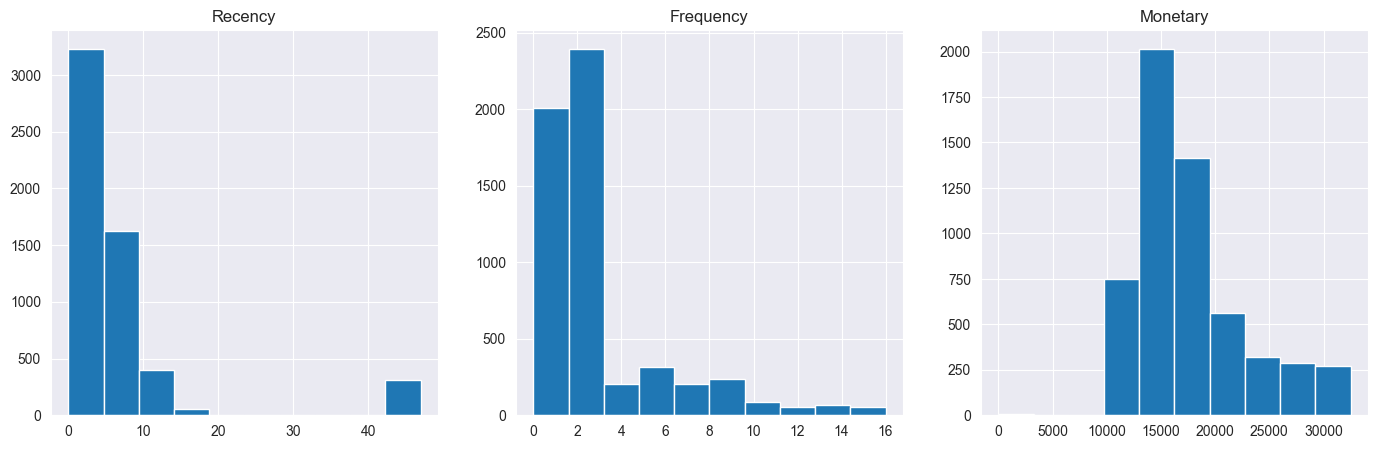

In [125]:
fig, ax = plt.subplots(1, 3, figsize=(17,5))

ax[0].hist(rfm_df['Recency'])
ax[0].set_title('Recency')

ax[1].hist(rfm_df['Frequency'])
ax[1].set_title('Frequency')

ax[2].hist(rfm_df['Monetary'])
ax[2].set_title('Monetary')
plt.show()

In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

rfm_scaled = pd.DataFrame(
    scaler.fit_transform(rfm_df),
    columns=rfm_df.columns,
    index=rfm_df.index
)
# rfm_df.describe()

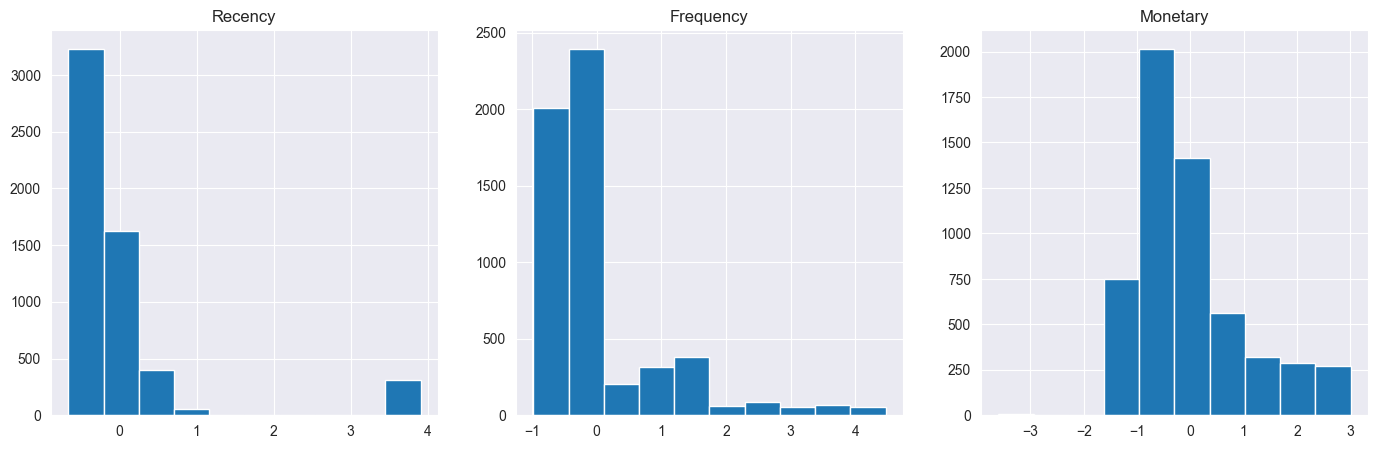

In [127]:
fig, ax = plt.subplots(1, 3, figsize=(17,5))

ax[0].hist(rfm_scaled['Recency'])
ax[0].set_title('Recency')

ax[1].hist(rfm_scaled['Frequency'])
ax[1].set_title('Frequency')

ax[2].hist(rfm_scaled['Monetary'])
ax[2].set_title('Monetary')
plt.show()

In [128]:
print(rfm_scaled[['Recency', 'Frequency', 'Monetary']].mean())
print(rfm_scaled[['Recency', 'Frequency', 'Monetary']].std())

Recency      0.000000e+00
Frequency    3.028957e-17
Monetary     2.019304e-16
dtype: float64
Recency      1.000089
Frequency    1.000089
Monetary     1.000089
dtype: float64


### 군집화

In [138]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(rfm_scaled)

rfm_scaled['cluster'] = labels
rfm_scaled

,Recency,Frequency,Monetary,cluster
0,-0.180903,-0.636249,-0.351465,0
1,-0.667565,-0.636249,-1.144715,0
2,-0.375568,-0.636249,-1.157316,0
3,-0.375568,-0.636249,-0.877047,0
4,-0.375568,-0.636249,-0.967895,0
...,...,...,...,...
5625,-0.278236,-0.296038,-0.538854,0
5626,3.907057,-0.296038,0.969195,2
5627,-0.278236,-0.296038,0.186920,0
5628,0.208426,-0.296038,0.034083,0


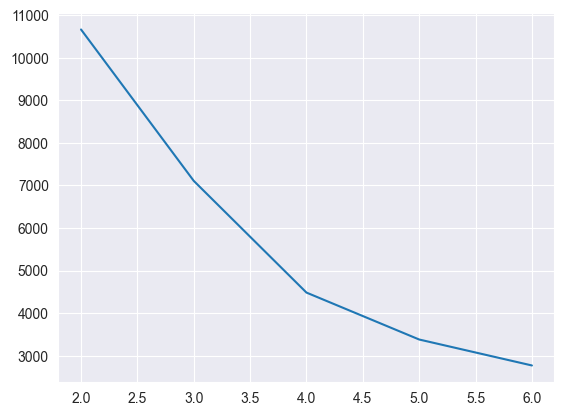

In [129]:
# inertia 측정 (Elbow 방법)
inertias = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled.iloc[:-1])
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 7), inertias)
plt.show()

(5630, 2)


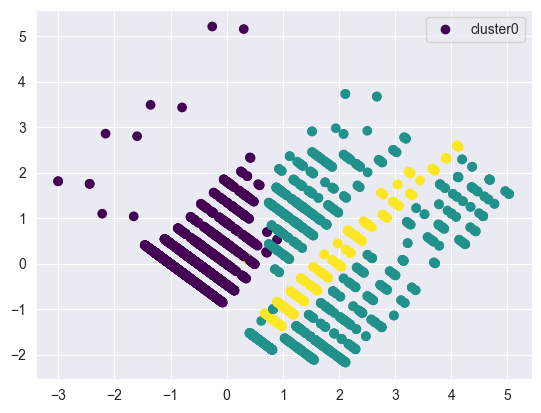

In [140]:
from sklearn.decomposition import PCA
# 시각화
y = rfm_scaled['cluster']


pca = PCA(n_components=2)
X_pca = pca.fit_transform(rfm_scaled.iloc[:,1:4])
print(X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', label='cluster0')
plt.legend()

plt.show()

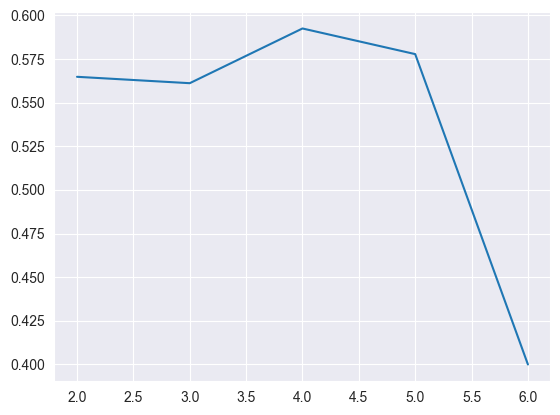

In [143]:
# silhuette 계수 측정
from sklearn.metrics import silhouette_score

sil_scores = []

for k in range(2,7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled.iloc[:, :-1])
    sil_scores.append(silhouette_score(rfm_scaled.iloc[:,:-1], labels))

plt.plot(range(2, 7), sil_scores)

In [95]:
# @title K-Means 군집화 후에 실루엣 계수 및 군집을 시각화
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

def visualize_silhouette(n_clusters_list, X_features):

    n_cols = len(n_clusters_list)

    fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(4 * n_cols, 4))

    if n_cols == 1:
        axs = [axs]

    for idx, n_clusters in enumerate(n_clusters_list):
        kmeans = KMeans(n_clusters=n_clusters, max_iter=500, random_state=0)
        cluster_labels = kmeans.fit_predict(X_features)

        # 전체 평균 실루엣 점수와 각 샘플의 실루엣 계수 계산
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        # 시각화 초기 설정
        ax = axs[idx]
        ax.set_title(f'Number of Clusters: {n_clusters}\nSilhouette Score: {round(sil_avg, 3)}')
        ax.set_xlim([-0.1, 1])
        ax.set_ylim([0, len(X_features) + (n_clusters + 1) * 10])
        ax.set_xlabel("Silhouette coefficient values")
        ax.set_ylabel("Cluster label")
        ax.set_yticks([])
        ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        y_lower = 10  # 막대 시작 위치 초기화

        for i in range(n_clusters):

            ith_cluster_sil_values = sil_values[cluster_labels == i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0] # 데이터샘플수
            y_upper = y_lower + size_cluster_i

            # 색상 설정 및 막대 시각화
            color = cm.nipy_spectral(float(i) / n_clusters) # 클러스터마다 다른 색을 자동으로 지정
            # fill_betweenx(y, x1, x2) : y축 위에 있는 두 개의 선(x1, x2) 사이에 색칠된 영역을 만듦
            # - y와 x1, x2가 모두 같은 길이여야 한다. (scala인 경우 broadcasting 가능)
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                             facecolor=color, edgecolor=color, alpha=0.7)

            # 클러스터 번호 표시
            # - x좌표: 0보다 왼쪽
            # - y좌표: 높이의 중간
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # 다음 막대 시작 위치 업데이트
            y_lower = y_upper + 10

        # 전체 실루엣 평균값 수직선 표시
        ax.axvline(x=sil_avg, color="red", linestyle="--")

    plt.tight_layout()
    plt.show()

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

def visualize_kmeans_cluster(n_clusters_list, X_features):
    """
    다양한 클러스터 수에 대해 KMeans 클러스터링을 수행하고,
    PCA로 2차원 변환한 결과를 시각화하는 함수.

    Parameters:
    - n_clusters_list : 클러스터 개수 리스트 (예: [2, 3, 4])
    - X_features : 클러스터링에 사용할 입력 데이터 (2차원 배열 또는 DataFrame)
    """
    n_cols = len(n_clusters_list)  # subplot 열 수
    fig, axs = plt.subplots(nrows=1, ncols=n_cols, figsize=(4 * n_cols, 4))

    # axs가 하나일 경우 리스트 형태로 변환 (인덱싱 편의 위해)
    if n_cols == 1:
        axs = [axs]

    # PCA로 입력 데이터를 2차원으로 변환
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    base_df = pd.DataFrame(pca_transformed, columns=['PCA1', 'PCA2'])

    # 클러스터 수를 바꿔가며 클러스터링과 시각화 반복
    for idx, n_clusters in enumerate(n_clusters_list):
        # KMeans 클러스터링 수행
        kmeans = KMeans(n_clusters=n_clusters, max_iter=500, random_state=0)
        cluster_labels = kmeans.fit_predict(pca_transformed)

        # 클러스터 결과를 복사본에 저장 (base_df를 매번 복사)
        df = base_df.copy()
        df['cluster'] = cluster_labels

        # 클러스터 라벨별로 시각화
        ax = axs[idx]
        unique_labels = np.unique(cluster_labels)
        markers = ['o', 's', '^', 'd', '*', 'D', 'v']  # 7개까지 지원

        for label in unique_labels:
            cluster_data = df[df['cluster'] == label]
            marker = markers[label % len(markers)]  # 마커 수 초과 대비
            cluster_name = f"Cluster {label}"

            ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'],
                       s=70, edgecolor='k', marker=marker, label=cluster_name)

        ax.set_title(f'Number of Clusters: {n_clusters}')
        ax.legend(loc='upper right')

    plt.tight_layout()
    plt.show()


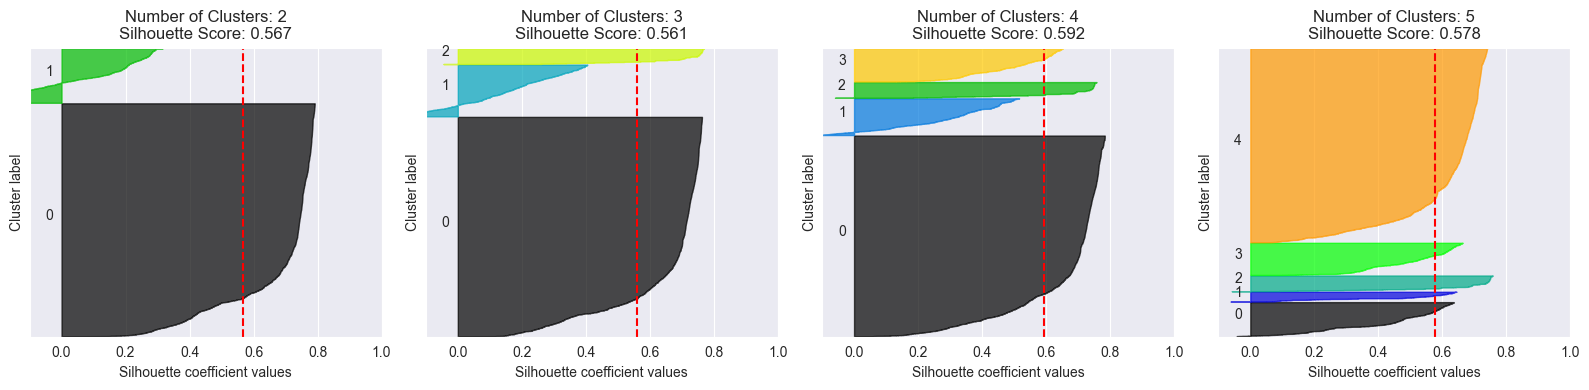

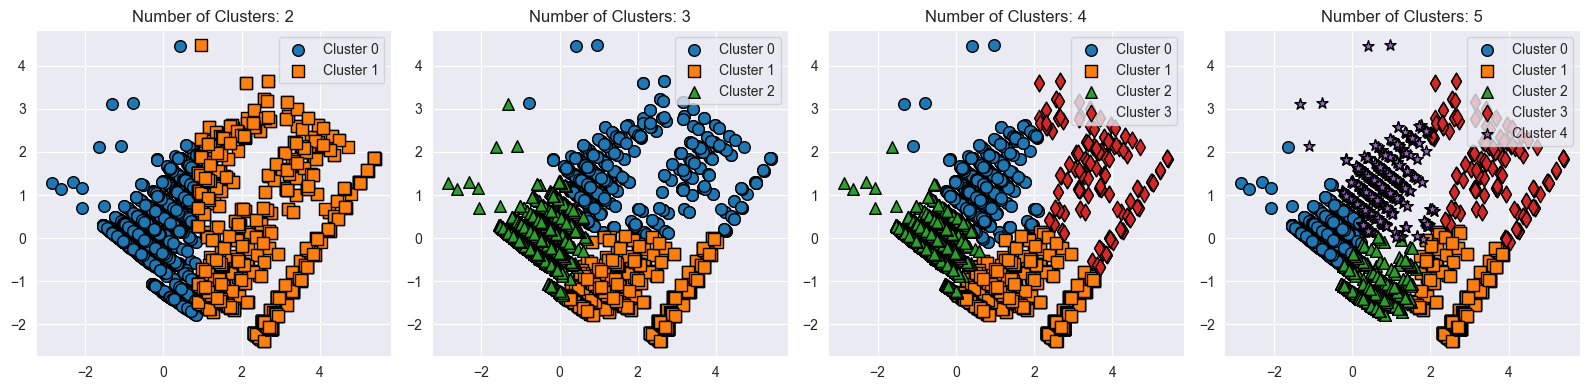

In [144]:
visualize_silhouette([2,3,4,5], rfm_scaled.iloc[:, :-1])
visualize_kmeans_cluster([2,3,4,5], rfm_scaled.iloc[:, :-1])

In [150]:
rfm_scaled.shape

(5630, 4)

In [158]:
y = rfm_scaled['cluster']
X = rfm_scaled.drop('cluster', axis=1)

In [159]:
# StandardScale된 df 원복
scaled_columns = ['Recency', 'Frequency', 'Monetary']

rfm_restored = pd.DataFrame(
    scaler.inverse_transform(X),
    columns=scaled_columns,
    index=rfm_df.index
)

In [160]:
rfm_restored['Cluster'] = y

In [162]:
rfm_restored.head()

,Recency,Frequency,Monetary,Cluster
0,5.0,1.0,15993.0,0
1,0.0,1.0,12090.0,0
2,3.0,1.0,12028.0,0
3,3.0,1.0,13407.0,0
4,3.0,1.0,12960.0,0


In [165]:
rfm_restored['Cluster'].value_counts()

Cluster
0    4072
1    1248
2     310
Name: count, dtype: int64

In [176]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(rfm_restored)

rfm_restored['cluster'] = labels

In [177]:
cluster_summary = rfm_restored.groupby('cluster').agg(
    count=('Recency', 'count'),
    recency_mean=('Recency', 'mean'),
    frequency_mean=('Frequency', 'mean'),
    Monetary_mean=('Monetary', 'mean')
).reset_index().round(2)
cluster_summary

,cluster,count,recency_mean,frequency_mean,Monetary_mean
0,0,1315,2.80,1.79,12900.94
1,1,1125,16.97,3.29,20978.04
2,2,2570,4.51,2.79,16105.71
3,3,620,6.86,4.74,28741.70


In [178]:
rfm_restored.shape

(5630, 5)

## 클러스터별 페르소나 분석

### **클러스터 0: 이탈 위험 고객 (1,315명)**
- **특징**: 최근 구매 2.8일 전, 구매 빈도 낮음(1.79회), 구매액 보통($12,900)
- **페르소나**: 최근 구매했지만 구매 빈도가 매우 낮은 신규 또는 일회성 구매 고객
- **대응 전략**:
  - 구매 직후 만족도 조사 및 피드백 수집
  - 재구매 유도를 위한 개인화된 상품 추천
  - 신규 고객 온보딩 프로그램 강화

### **클러스터 1: VIP 고객 (1,125명)**
- **특징**: 구매 간격 길음(16.97일), 높은 구매 빈도(3.29회), 최고 구매액($20,978)
- **페르소나**: 구매력이 뛰어나고 충성도 높은 프리미엄 고객층
- **대응 전략**:
  - VIP 전용 혜택 및 프리미엄 서비스 제공
  - 개인 맞춤형 컨시어지 서비스
  - 신상품 우선 공개 및 독점 이벤트 초대

### **클러스터 2: 충성 고객 (2,570명, 최대 규모)**
- **특징**: 적당한 구매 간격(4.51일), 보통 구매 빈도(2.79회), 적당한 구매액($16,105)
- **페르소나**: 꾸준히 구매하는 안정적인 핵심 고객층
- **대응 전략**:
  - 정기적인 프로모션 및 할인 혜택
  - 로열티 프로그램을 통한 장기 관계 유지
  - 교차 판매 및 상향 판매 기회 모색

### **클러스터 3: 고가치 신규 고객 (620명)**
- **특징**: 구매 간격 보통(6.86일), 높은 구매 빈도(4.74회), 최고 구매액($28,741)
- **페르소나**: 구매력과 구매 의욕이 모두 높은 프리미엄 액티브 고객
- **대응 전략**:
  - 최우선 관리 대상으로 개인화된 서비스 제공
  - 프리미엄 제품군 중심의 마케팅
  - 장기 고객 관계 구축을 위한 특별 관리 프로그램

## 전체 마케팅 우선순위
1. **클러스터 3** (고가치 신규) - 최우선 관리
2. **클러스터 1** (VIP) - 유지 및 강화
3. **클러스터 2** (충성 고객) - 안정적 관리
4. **클러스터 0** (이탈 위험) - 재활성화 집중

In [179]:
import joblib  # 또는 import pickle

# joblib 사용 예시
model = joblib.load('C:/Workspaces/SKN14-2nd-3Team/JeongMinYoung/project1/models/hgb_model(threshold=0.0005).pkl')

In [185]:
X = df.drop('Churn', axis=1)

In [189]:
rfm_restored['churn_proba'] = model.predict_proba(X)[:, 1]  # 이탈 클래스(1)의 확률
rfm_restored['churn_pred'] = model.predict(X)

In [193]:
cluster_summary = rfm_restored.groupby('cluster').agg(
    count=('Recency', 'count'),
    recency_mean=('Recency', 'mean'),
    frequency_mean=('Frequency', 'mean'),
    Monetary_mean=('Monetary', 'mean'),
    churn_rate=('churn_proba', 'mean')
).reset_index().round(3)
cluster_summary

,cluster,count,recency_mean,frequency_mean,Monetary_mean,churn_rate
0,0,1315,2.800,1.788,12900.940,0.138
1,1,1125,16.972,3.288,20978.043,0.055
2,2,2570,4.509,2.790,16105.711,0.103
3,3,620,6.856,4.739,28741.702,0.054
